# Assignment 3: Data Mining in Action - Dean Stokeld 24923029

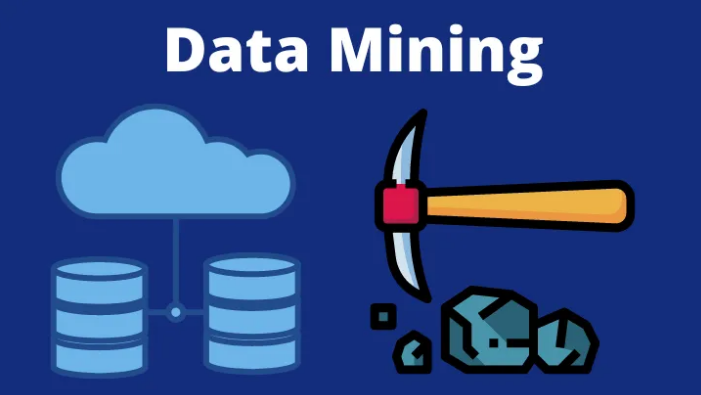

Python version: 3.9.18

NumPy version: 1.24.4

pandas version: 1.3.3

scikit-learn version: 1.1.2

imbalanced-learn version: 0.11.0

XGBoost version: 1.7.3

CatBoost version: 1.2

LightGBM version: 3.3.5

matplotlib version: 3.7.2

## Importing datasets

In [1]:
import pandas as pd

healthcare_data = pd.read_csv('Assignment3-Healthcare-Dataset.csv')
unknown_healthcare_data = pd.read_csv('Assignment3-Unknown-Dataset.csv')

## Checking for missing data 

In [2]:
missing_val = healthcare_data.isnull().sum()
missing_val = missing_val[missing_val > 0].sort_values(ascending=False)
missing_perc = (missing_val / len(healthcare_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_val, 'Percentage (%)': missing_perc})

print(missing_data)

                Missing Values  Percentage (%)
LOSgroupNum              42447       89.968207
marital_status            8179       17.335735
NumCallouts               2370        5.023315
age                       2339        4.957609
religion                   372        0.788470
AdmitDiagnosis              20        0.042391


In [3]:
missing_val = unknown_healthcare_data.isnull().sum()
missing_val = missing_val[missing_val > 0].sort_values(ascending=False)
missing_perc = (missing_val / len(unknown_healthcare_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_val, 'Percentage (%)': missing_perc})

print(missing_data)

                Missing Values  Percentage (%)
LOSgroupNum              10631       90.123771
marital_status            1949       16.522550
age                        609        5.162767
NumCallouts                578        4.899966
religion                    86        0.729061
AdmitDiagnosis               5        0.042387


## Preprocessing

#### Setting all ages to 0 for all instances of  AdmitDiagnosis == 'NEWBORN', I also set the other obvious AdmitDiagnosis types with missing ages to 0 as well, however it reduced accuracy on the unknown dataset for some reason, so I'll leave it out for now

In [4]:
for i, row in healthcare_data.iterrows():
    if row['AdmitDiagnosis'] == 'NEWBORN':
        healthcare_data.at[i, 'age'] = 0
#     elif row['AdmitDiagnosis'] == 'PREMATURITY':
#         healthcare_data.at[i, 'age'] = 0
#     elif row['AdmitDiagnosis'] == 'PREMATURITY/S/P SURGERY':
#         healthcare_data.at[i, 'age'] = 0
#     elif row['AdmitDiagnosis'] == 'EXTREME PREMATURITY':
#         healthcare_data.at[i, 'age'] = 0
#     elif row['AdmitDiagnosis'] == 'HYPERBILIRUBINEMIA' and row['marital_status'] != 'MARRIED':
#         healthcare_data.at[i, 'age'] = 0
#     elif row['AdmitDiagnosis'] == 'HYPERBILINEMIA':
#         healthcare_data.at[i, 'age'] = 0
    else:
        pass
        
for i, row in unknown_healthcare_data.iterrows():
    if row['AdmitDiagnosis'] == 'NEWBORN':
        unknown_healthcare_data.at[i, 'age'] = 0
    else:
        pass

### Setting all patient's with an age less than 18 a marital status of 'SINGLE'

In [5]:
condition = (healthcare_data['age'] < 18) & (healthcare_data['marital_status'].isna())
healthcare_data.loc[condition, 'marital_status'] = 'NA'

condition_unknown = (unknown_healthcare_data['age'] < 18) & (unknown_healthcare_data['marital_status'].isna())
unknown_healthcare_data.loc[condition_unknown, 'marital_status'] = 'NA'

### Checking the remaining missing values 

In [6]:
missing_val = healthcare_data.isnull().sum()
missing_val = missing_val[missing_val > 0].sort_values(ascending=False)
missing_perc = (missing_val / len(healthcare_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_val, 'Percentage (%)': missing_perc})

print(missing_data)

                Missing Values  Percentage (%)
LOSgroupNum              42447       89.968207
NumCallouts               2370        5.023315
age                       2036        4.315388
marital_status            1921        4.071641
religion                   372        0.788470
AdmitDiagnosis              20        0.042391


In [7]:
missing_val = unknown_healthcare_data.isnull().sum()
missing_val = missing_val[missing_val > 0].sort_values(ascending=False)
missing_perc = (missing_val / len(unknown_healthcare_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_val, 'Percentage (%)': missing_perc})

print(missing_data)

                Missing Values  Percentage (%)
LOSgroupNum              10631       90.123771
NumCallouts                578        4.899966
age                        524        4.442184
marital_status             431        3.653781
religion                    86        0.729061
AdmitDiagnosis               5        0.042387


### Assigning missing LOSgroupNum values based on LOSdays

In [8]:
import numpy as np

for i, row in healthcare_data.iterrows():
    if pd.isna(row['LOSgroupNum']):
        if row['LOSdays'] < 4:
            healthcare_data.at[i, 'LOSgroupNum'] = 1
        elif row['LOSdays'] == 4:
            healthcare_data.at[i, 'LOSgroupNum'] = 1.5
        elif row['LOSdays'] < 8:
            healthcare_data.at[i, 'LOSgroupNum'] = 2
        elif row['LOSdays'] == 8:
            healthcare_data.at[i, 'LOSgroupNum'] = 2.5
        elif row['LOSdays'] < 12:
            healthcare_data.at[i, 'LOSgroupNum'] = 3
        elif row['LOSdays'] == 12:
            healthcare_data.at[i, 'LOSgroupNum'] = 3.5
        elif row['LOSdays'] > 12:
            healthcare_data.at[i, 'LOSgroupNum'] = 4
            
for i, row in unknown_healthcare_data.iterrows():
    if pd.isna(row['LOSgroupNum']):
        if row['LOSdays'] < 4:
            unknown_healthcare_data.at[i, 'LOSgroupNum'] = 1
        elif row['LOSdays'] == 4:
            unknown_healthcare_data.at[i, 'LOSgroupNum'] = 1.5
        elif row['LOSdays'] < 8:
            unknown_healthcare_data.at[i, 'LOSgroupNum'] = 2
        elif row['LOSdays'] == 8:
            unknown_healthcare_data.at[i, 'LOSgroupNum'] = 2.5
        elif row['LOSdays'] < 12:
            unknown_healthcare_data.at[i, 'LOSgroupNum'] = 3
        elif row['LOSdays'] == 12:
            unknown_healthcare_data.at[i, 'LOSgroupNum'] = 3.5
        elif row['LOSdays'] > 12:
            unknown_healthcare_data.at[i, 'LOSgroupNum'] = 4

### Finding median age based on marital_status

In [9]:
widowed_median_age = healthcare_data[healthcare_data['marital_status'] == 'WIDOWED']['age'].median()
print('WIDOWED: ', widowed_median_age)
widowed_median_age = unknown_healthcare_data[unknown_healthcare_data['marital_status'] == 'WIDOWED']['age'].median()
print('WIDOWED-Unknown: ', widowed_median_age)
single_median_age = healthcare_data[healthcare_data['marital_status'] == 'SINGLE']['age'].median()
print('SINGLE: ', single_median_age)
single_median_age = unknown_healthcare_data[unknown_healthcare_data['marital_status'] == 'SINGLE']['age'].median()
print('SINGLE-Unknown: ', single_median_age)

WIDOWED:  76.0
WIDOWED-Unknown:  76.0
SINGLE:  51.0
SINGLE-Unknown:  52.0


In [10]:
median_age = healthcare_data['age'].median()

for i, row in healthcare_data.iterrows():
    if pd.isna(row['age']):
        if row['marital_status'] == 'SINGLE':
            imputed_age = int(median_age - 10)
        elif row['marital_status'] == 'WIDOWED':
            imputed_age = int(median_age + 10)
        else:
            imputed_age = int(median_age)
        healthcare_data.at[i, 'age'] = imputed_age    
    
for i, row in unknown_healthcare_data.iterrows():
    if pd.isna(row['age']):
        if row['marital_status'] == 'SINGLE':
            imputed_age = int(median_age - 10)
        elif row['marital_status'] == 'WIDOWED':
            imputed_age = int(median_age + 10)
        else:
            imputed_age = int(median_age)
        unknown_healthcare_data.at[i, 'age'] = imputed_age

### Filling missing NumCallouts with median 

In [11]:
healthcare_data['NumCallouts'].fillna(healthcare_data['NumCallouts'].median(), inplace=True)

unknown_healthcare_data['NumCallouts'].fillna(unknown_healthcare_data['NumCallouts'].median(), inplace=True)

### Checking the remaining missing values 

In [12]:
missing_val = healthcare_data.isnull().sum()
missing_val = missing_val[missing_val > 0].sort_values(ascending=False)
missing_perc = (missing_val / len(healthcare_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_val, 'Percentage (%)': missing_perc})

print(missing_data)

                Missing Values  Percentage (%)
marital_status            1921        4.071641
religion                   372        0.788470
AdmitDiagnosis              20        0.042391


In [13]:
missing_val = unknown_healthcare_data.isnull().sum()
missing_val = missing_val[missing_val > 0].sort_values(ascending=False)
missing_perc = (missing_val / len(unknown_healthcare_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_val, 'Percentage (%)': missing_perc})

print(missing_data)

                Missing Values  Percentage (%)
marital_status             431        3.653781
religion                    86        0.729061
AdmitDiagnosis               5        0.042387


### Filling missing values in marital_status, religion and AdmitDiagnosis with 'NA'

In [14]:
healthcare_data['marital_status'].fillna('NA', inplace=True)
healthcare_data['religion'].fillna('NA', inplace=True)
healthcare_data['AdmitDiagnosis'].fillna('NA', inplace=True)

unknown_healthcare_data['marital_status'].fillna('NA', inplace=True)
unknown_healthcare_data['religion'].fillna('NA', inplace=True)
unknown_healthcare_data['AdmitDiagnosis'].fillna('NA', inplace=True)

### Checking the remaining missing values 

In [15]:
missing_val = healthcare_data.isnull().sum()
missing_val = missing_val[missing_val > 0].sort_values(ascending=False)
missing_perc = (missing_val / len(healthcare_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_val, 'Percentage (%)': missing_perc})

print(missing_data)

Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []


In [16]:
missing_val = unknown_healthcare_data.isnull().sum()
missing_val = missing_val[missing_val > 0].sort_values(ascending=False)
missing_perc = (missing_val / len(unknown_healthcare_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_val, 'Percentage (%)': missing_perc})

print(missing_data)

Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []


### Stripping leading spaces and replacing JSON characters in feature names (for LightGBM model)

In [17]:
healthcare_data['AdmitDiagnosis'] = healthcare_data['AdmitDiagnosis'].str.strip()
unknown_healthcare_data['AdmitDiagnosis'] = unknown_healthcare_data['AdmitDiagnosis'].str.strip()

healthcare_data.columns = [col.replace(' ', '_').replace(':', '').replace('[', '').replace(
    ']', '') for col in healthcare_data.columns]

unknown_healthcare_data.columns = [col.replace(' ', '_').replace(':', '').replace('[', '').replace(
    ']', '') for col in unknown_healthcare_data.columns]

## Splitting data into training and evaluation sets

In [18]:
from sklearn.model_selection import train_test_split

X = healthcare_data.drop('ExpiredHospital', axis=1)
y = healthcare_data['ExpiredHospital']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

((35385, 26), (11795, 26), (35385,), (11795,))

## Encoding categorical variables to numerical data

### One-hot encoding

In [19]:
X_train_hot = pd.get_dummies(X_train)
X_val_hot = pd.get_dummies(X_val)
unknown_healthcare_data_hot = pd.get_dummies(unknown_healthcare_data)

X_val_hot = X_val_hot.reindex(columns=X_train_hot.columns)

X_train_hot = X_train_hot.fillna(0)
X_val_hot = X_val_hot.fillna(0)

### Label encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

combined = pd.concat([X_train, X_val, unknown_healthcare_data], axis=0)

categorical_cols = combined.select_dtypes(include=[object, 'category']).columns
for column in categorical_cols: 
    combined[column] = LabelEncoder().fit_transform(combined[column])

train_len = len(X_train)
val_len = len(X_val)

X_train = combined.iloc[:train_len]
X_val = combined.iloc[train_len:train_len+val_len]
unknown_healthcare_data = combined.iloc[train_len+val_len:]

## Random Forest (RF)

### Using label encoded data

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.9363
F1 Score: 0.5894
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10608
           1       0.84      0.45      0.59      1187

    accuracy                           0.94     11795
   macro avg       0.89      0.72      0.78     11795
weighted avg       0.93      0.94      0.93     11795

Confusion Matrix: 
[[10505   103]
 [  648   539]]


### ROC Curve 

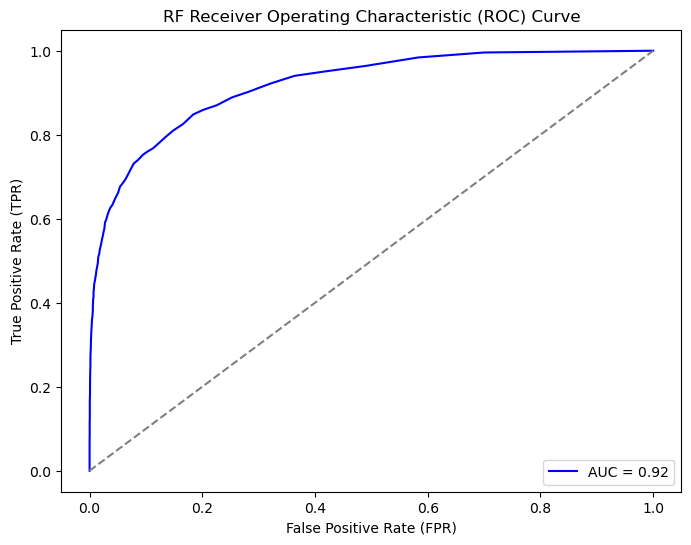

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

probabilities = rf_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('RF Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## Decision Tree (DT)

### Using label encoded data

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

predictions = dt_model.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.8981
F1 Score: 0.5053
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     10608
           1       0.49      0.52      0.51      1187

    accuracy                           0.90     11795
   macro avg       0.72      0.73      0.72     11795
weighted avg       0.90      0.90      0.90     11795

Confusion Matrix: 
[[9979  629]
 [ 573  614]]


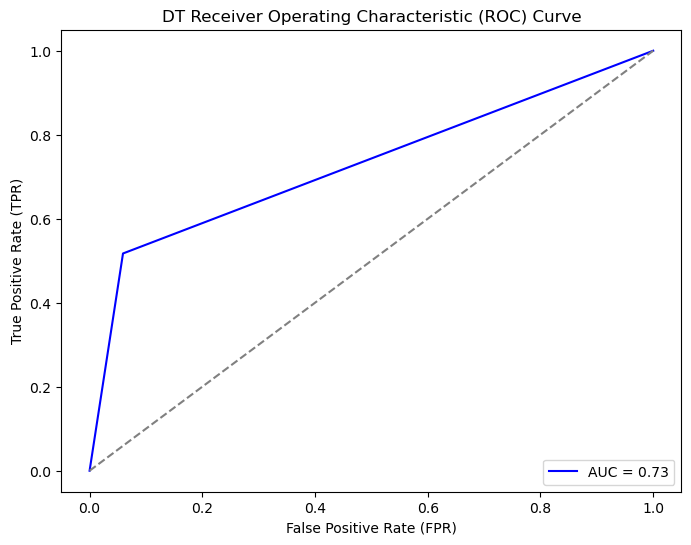

In [24]:
probabilities = dt_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('DT Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

### Using one-hot encoded data 

In [25]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_hot, y_train)

predictions = dt_model.predict(X_val_hot)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.9089
F1 Score: 0.5173
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10608
           1       0.55      0.49      0.52      1187

    accuracy                           0.91     11795
   macro avg       0.75      0.72      0.73     11795
weighted avg       0.90      0.91      0.91     11795

Confusion Matrix: 
[[10144   464]
 [  611   576]]


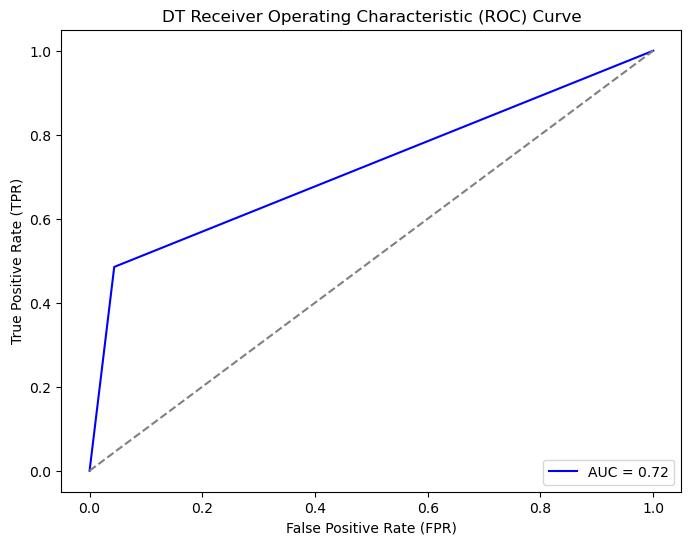

In [26]:
probabilities = dt_model.predict_proba(X_val_hot)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('DT Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## XGBoost (XGB)

### Using label encoded data

In [27]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

predictions = xgb_model.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.9401
F1 Score: 0.6449
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     10608
           1       0.80      0.54      0.64      1187

    accuracy                           0.94     11795
   macro avg       0.87      0.76      0.81     11795
weighted avg       0.94      0.94      0.93     11795

Confusion Matrix: 
[[10446   162]
 [  545   642]]


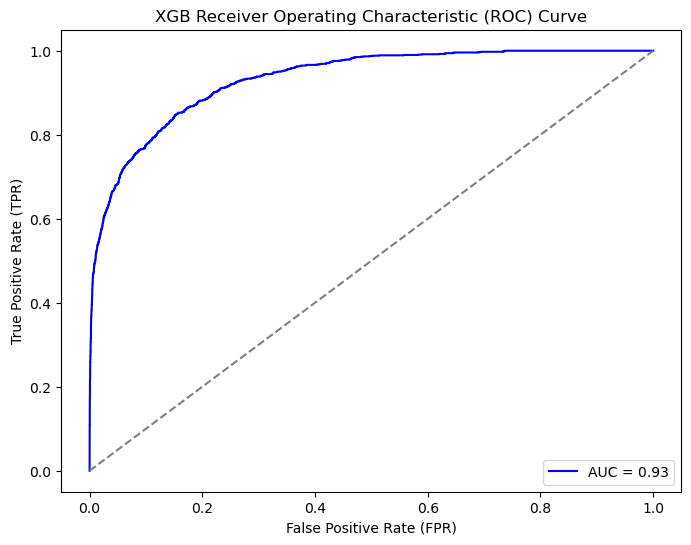

In [28]:
probabilities = xgb_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('XGB Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## LightGBM (LGBM)

### Using label encoded data

In [29]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

predictions = lgbm_model.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.9423
F1 Score: 0.6517
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10608
           1       0.83      0.54      0.65      1187

    accuracy                           0.94     11795
   macro avg       0.89      0.76      0.81     11795
weighted avg       0.94      0.94      0.94     11795

Confusion Matrix: 
[[10477   131]
 [  550   637]]


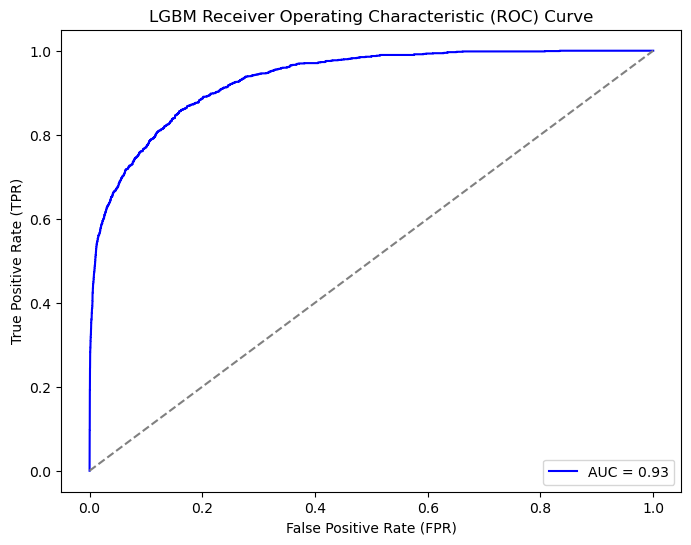

In [30]:
probabilities = lgbm_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('LGBM Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## CatBoost

### Using label encoded data

In [31]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(random_state=42)
catboost_model.fit(X_train, y_train)

predictions = catboost_model.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Learning rate set to 0.047237
0:	learn: 0.6344771	total: 150ms	remaining: 2m 29s
1:	learn: 0.5820967	total: 156ms	remaining: 1m 18s
2:	learn: 0.5395455	total: 162ms	remaining: 54s
3:	learn: 0.5003715	total: 169ms	remaining: 42.1s
4:	learn: 0.4675348	total: 175ms	remaining: 34.9s
5:	learn: 0.4351031	total: 182ms	remaining: 30.1s
6:	learn: 0.4089056	total: 189ms	remaining: 26.8s
7:	learn: 0.3840359	total: 196ms	remaining: 24.3s
8:	learn: 0.3632893	total: 202ms	remaining: 22.3s
9:	learn: 0.3465385	total: 209ms	remaining: 20.7s
10:	learn: 0.3300563	total: 215ms	remaining: 19.3s
11:	learn: 0.3152090	total: 221ms	remaining: 18.2s
12:	learn: 0.3009309	total: 227ms	remaining: 17.2s
13:	learn: 0.2909259	total: 233ms	remaining: 16.4s
14:	learn: 0.2785552	total: 239ms	remaining: 15.7s
15:	learn: 0.2692453	total: 245ms	remaining: 15.1s
16:	learn: 0.2622979	total: 252ms	remaining: 14.6s
17:	learn: 0.2550642	total: 258ms	remaining: 14.1s
18:	learn: 0.2483430	total: 264ms	remaining: 13.7s
19:	learn: 

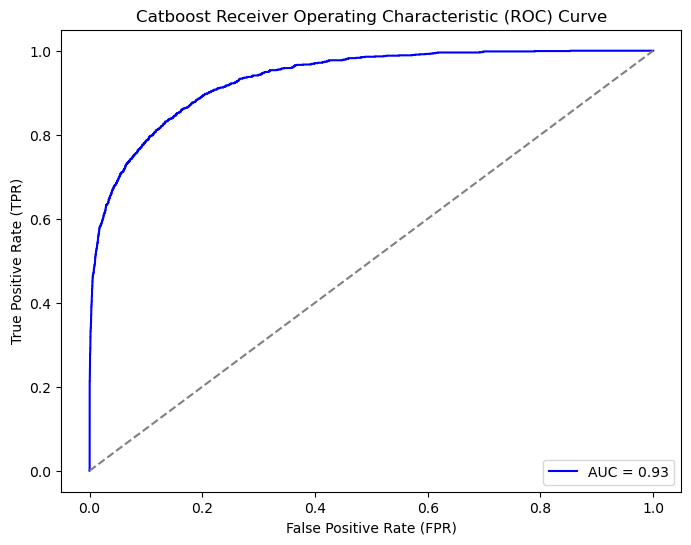

In [32]:
probabilities = catboost_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('Catboost Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

### Using one-hot encoded data 

In [33]:
catboost_model = CatBoostClassifier(random_state=42)
catboost_model.fit(X_train_hot, y_train)

predictions = catboost_model.predict(X_val_hot)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Learning rate set to 0.047237
0:	learn: 0.6389064	total: 20.1ms	remaining: 20.1s
1:	learn: 0.5837763	total: 39.6ms	remaining: 19.8s
2:	learn: 0.5396289	total: 58.9ms	remaining: 19.6s
3:	learn: 0.4974437	total: 78.1ms	remaining: 19.4s
4:	learn: 0.4649894	total: 98.9ms	remaining: 19.7s
5:	learn: 0.4369539	total: 118ms	remaining: 19.5s
6:	learn: 0.4093672	total: 138ms	remaining: 19.5s
7:	learn: 0.3860701	total: 158ms	remaining: 19.5s
8:	learn: 0.3667992	total: 178ms	remaining: 19.6s
9:	learn: 0.3465153	total: 199ms	remaining: 19.7s
10:	learn: 0.3309173	total: 217ms	remaining: 19.5s
11:	learn: 0.3166808	total: 235ms	remaining: 19.3s
12:	learn: 0.3036446	total: 253ms	remaining: 19.2s
13:	learn: 0.2932247	total: 272ms	remaining: 19.2s
14:	learn: 0.2840158	total: 291ms	remaining: 19.1s
15:	learn: 0.2751583	total: 310ms	remaining: 19s
16:	learn: 0.2681168	total: 329ms	remaining: 19s
17:	learn: 0.2609074	total: 348ms	remaining: 19s
18:	learn: 0.2538876	total: 366ms	remaining: 18.9s
19:	learn: 0

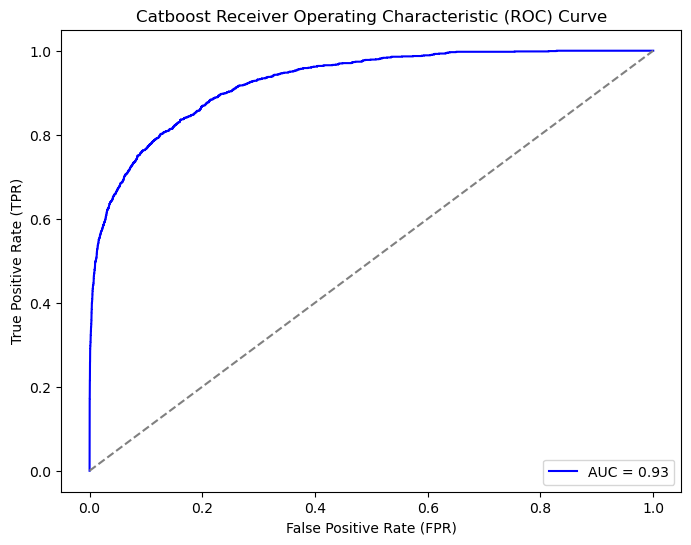

In [34]:
probabilities = catboost_model.predict_proba(X_val_hot)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('Catboost Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## Support Vector Machine (SVM)

### Using one-hot encoded data

In [35]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train_hot, y_train)

predictions = svm_model.predict(X_val_hot)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.9072
F1 Score: 0.1762
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     10608
           1       0.83      0.10      0.18      1187

    accuracy                           0.91     11795
   macro avg       0.87      0.55      0.56     11795
weighted avg       0.90      0.91      0.87     11795

Confusion Matrix: 
[[10584    24]
 [ 1070   117]]


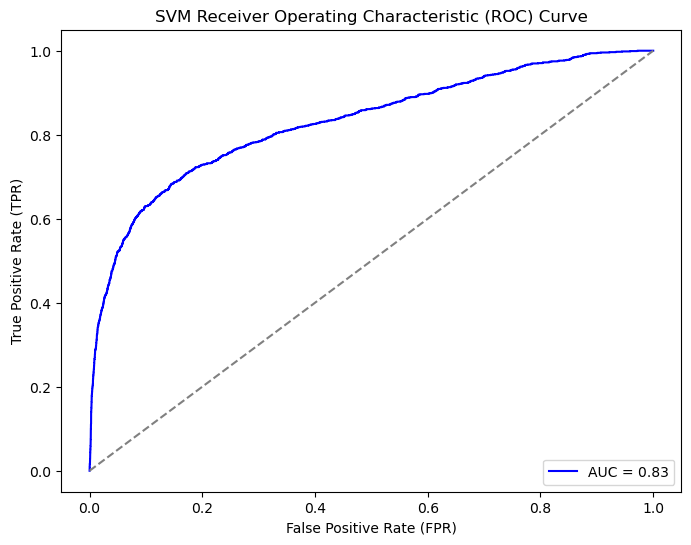

In [36]:
distances = svm_model.decision_function(X_val_hot)

fpr, tpr, thresholds = roc_curve(y_val, distances)

auc = roc_auc_score(y_val, distances)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('SVM Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## Gaussian Naive Bayes (GNB)

### Using label encoded data

In [37]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

predictions = gnb_model.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.8998
F1 Score: 0.4685
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     10608
           1       0.50      0.44      0.47      1187

    accuracy                           0.90     11795
   macro avg       0.72      0.70      0.71     11795
weighted avg       0.89      0.90      0.90     11795

Confusion Matrix: 
[[10092   516]
 [  666   521]]


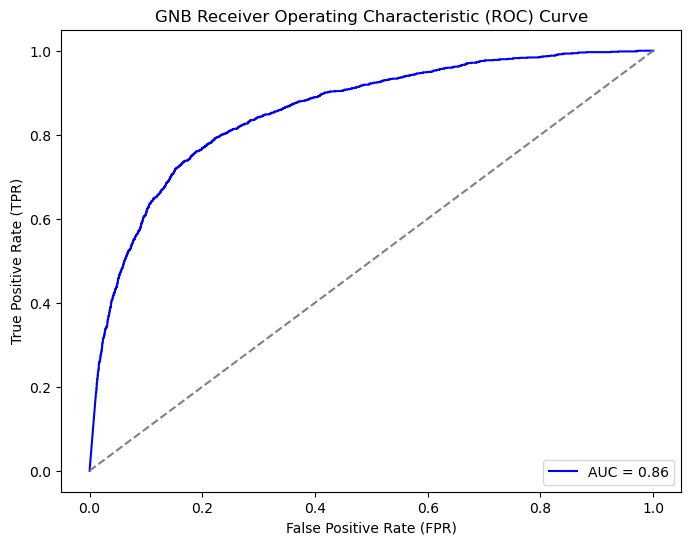

In [38]:
probabilities = gnb_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('GNB Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## Logistic Regression (LogReg)

### Using label encoded data

In [39]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

predictions = logreg_model.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.9178
F1 Score: 0.4164
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10608
           1       0.73      0.29      0.42      1187

    accuracy                           0.92     11795
   macro avg       0.83      0.64      0.69     11795
weighted avg       0.91      0.92      0.90     11795

Confusion Matrix: 
[[10479   129]
 [  841   346]]


C:\Users\Dean\anaconda3\envs\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


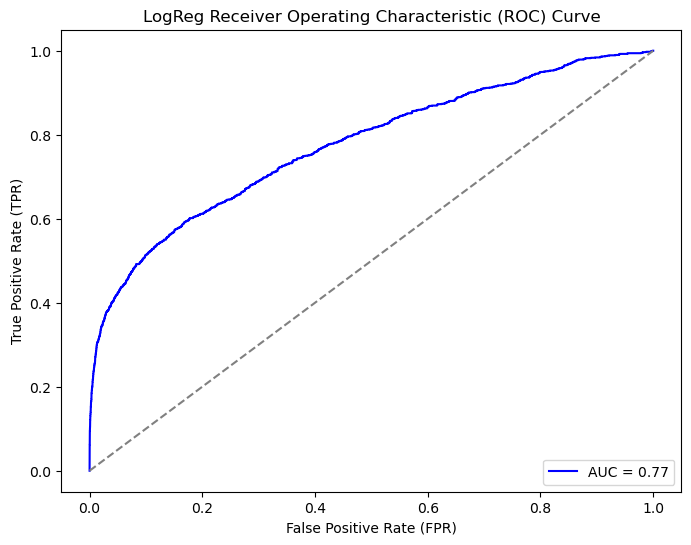

In [40]:
probabilities = logreg_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('LogReg Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

### Using one-hot encoded data

In [41]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_hot, y_train)

predictions = logreg_model.predict(X_val_hot)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

C:\Users\Dean\anaconda3\envs\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9148
F1 Score: 0.4140
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10608
           1       0.67      0.30      0.41      1187

    accuracy                           0.91     11795
   macro avg       0.80      0.64      0.68     11795
weighted avg       0.90      0.91      0.90     11795

Confusion Matrix: 
[[10435   173]
 [  832   355]]


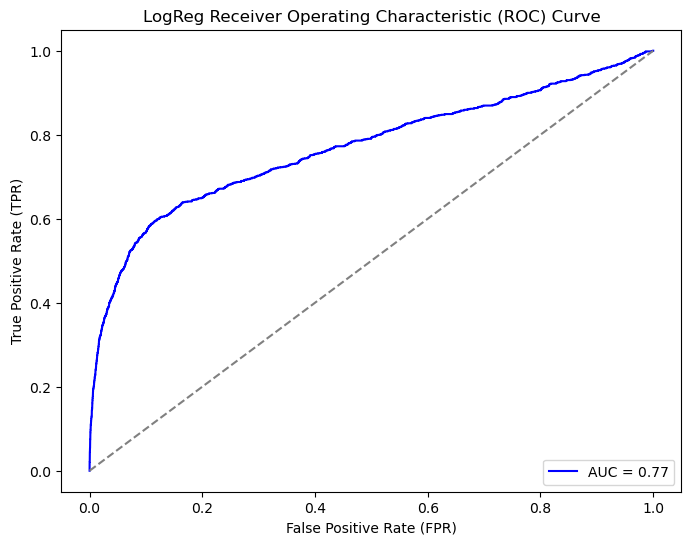

In [42]:
probabilities = logreg_model.predict_proba(X_val_hot)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('LogReg Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## Neural Network (NN)

### Using one-hot encoded data

In [43]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_hot, y_train)

predictions = nn_model.predict(X_val_hot)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.9380
F1 Score: 0.6238
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10608
           1       0.80      0.51      0.62      1187

    accuracy                           0.94     11795
   macro avg       0.87      0.75      0.80     11795
weighted avg       0.93      0.94      0.93     11795

Confusion Matrix: 
[[10458   150]
 [  581   606]]


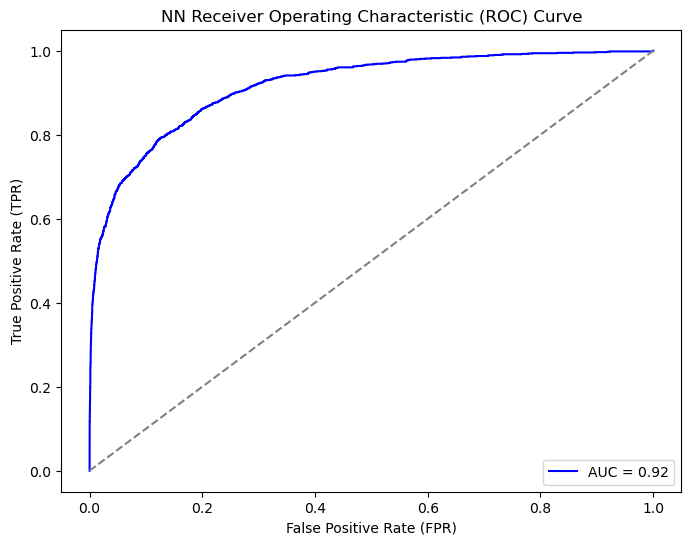

In [44]:
probabilities = nn_model.predict_proba(X_val_hot)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('NN Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## K-Nearest Neighbors (KNN)

### Using one-hot encoded data

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(algorithm='brute')
knn_model.fit(X_train_hot, y_train)

predictions = knn_model.predict(X_val_hot)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.9201
F1 Score: 0.5011
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10608
           1       0.67      0.40      0.50      1187

    accuracy                           0.92     11795
   macro avg       0.81      0.69      0.73     11795
weighted avg       0.91      0.92      0.91     11795

Confusion Matrix: 
[[10380   228]
 [  714   473]]


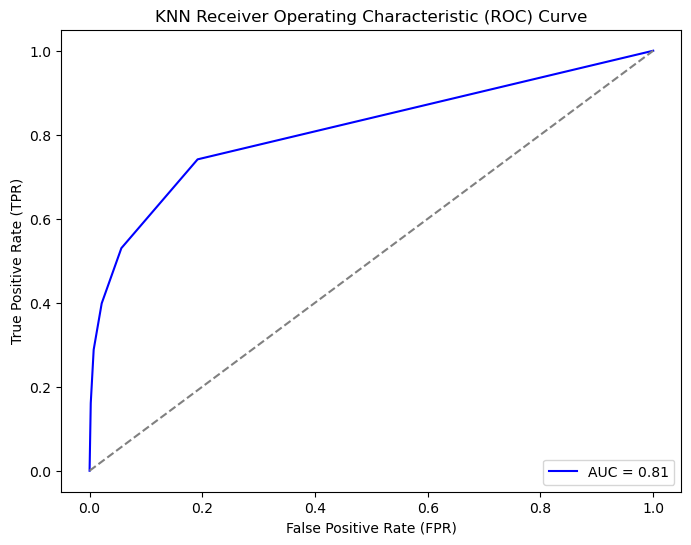

In [46]:
probabilities = knn_model.predict_proba(X_val_hot)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('KNN Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## Stacking

### Using label encoded data

In [47]:
from sklearn.ensemble import StackingClassifier

stacking_model = StackingClassifier(estimators=[ 
    ('xgb', xgb_model), 
    ('lgbm', lgbm_model), 
    ('catboost', catboost_model)], final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)
predictions = stacking_model.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Learning rate set to 0.047237
0:	learn: 0.6344771	total: 7.29ms	remaining: 7.29s
1:	learn: 0.5820967	total: 14.1ms	remaining: 7.05s
2:	learn: 0.5395455	total: 21.3ms	remaining: 7.07s
3:	learn: 0.5003715	total: 28.1ms	remaining: 6.99s
4:	learn: 0.4675348	total: 34.9ms	remaining: 6.93s
5:	learn: 0.4351031	total: 41.6ms	remaining: 6.88s
6:	learn: 0.4089056	total: 48.1ms	remaining: 6.83s
7:	learn: 0.3840359	total: 55.2ms	remaining: 6.84s
8:	learn: 0.3632893	total: 62.2ms	remaining: 6.85s
9:	learn: 0.3465385	total: 69.3ms	remaining: 6.86s
10:	learn: 0.3300563	total: 76.5ms	remaining: 6.88s
11:	learn: 0.3152090	total: 83.6ms	remaining: 6.88s
12:	learn: 0.3009309	total: 90.4ms	remaining: 6.87s
13:	learn: 0.2909259	total: 97.2ms	remaining: 6.85s
14:	learn: 0.2785552	total: 104ms	remaining: 6.81s
15:	learn: 0.2692453	total: 110ms	remaining: 6.79s
16:	learn: 0.2622979	total: 117ms	remaining: 6.76s
17:	learn: 0.2550642	total: 124ms	remaining: 6.75s
18:	learn: 0.2483430	total: 130ms	remaining: 6.7

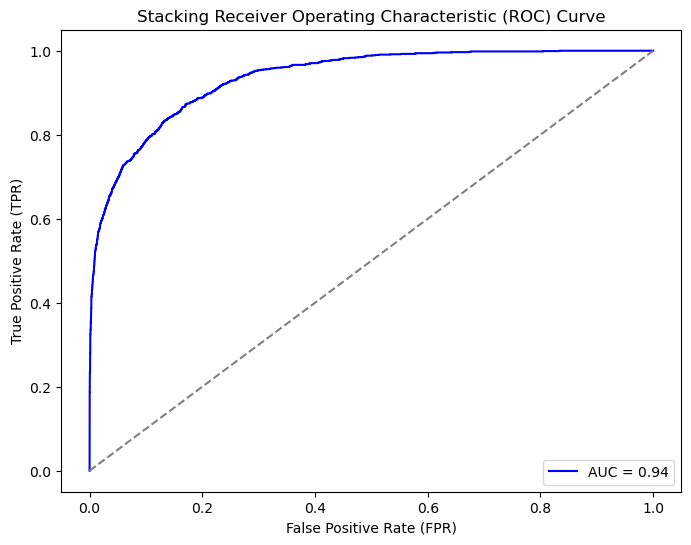

In [48]:
probabilities = stacking_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('Stacking Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## Principal component analysis (PCA)

In [49]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_hot_scaled = scaler.fit_transform(X_train_hot)
X_val_hot_scaled = scaler.transform(X_val_hot)

X_train_hot_scaled = np.nan_to_num(X_train_hot_scaled, copy=False)
X_val_hot_scaled = np.nan_to_num(X_val_hot_scaled, copy=False)

n_components = 10
pca = PCA(n_components=n_components)

X_train_hot_pca = pca.fit_transform(X_train_hot_scaled)
X_val_hot_pca = pca.transform(X_val_hot_scaled)

## Neural Network (NN)

### Training a neural network on one-hot encoded reduced data

In [50]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_hot_pca, y_train)

predictions = nn_model.predict(X_val_hot_pca)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.9260
F1 Score: 0.4933
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10608
           1       0.79      0.36      0.49      1187

    accuracy                           0.93     11795
   macro avg       0.86      0.67      0.73     11795
weighted avg       0.92      0.93      0.91     11795

Confusion Matrix: 
[[10497   111]
 [  762   425]]


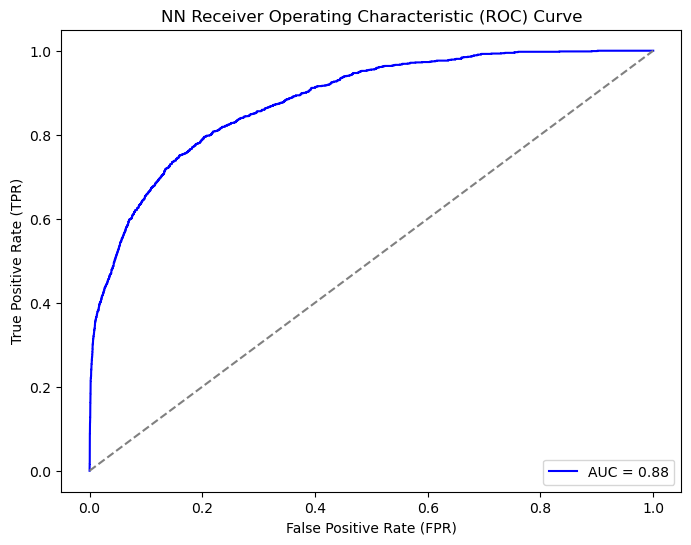

In [51]:
probabilities = nn_model.predict_proba(X_val_hot_pca)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('NN Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## Resampling (LightGBM Only)

### SMOTE

In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_resampled_smote, y_resampled_smote)

predictions = lgbm_model.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.9356
F1 Score: 0.6425
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     10608
           1       0.73      0.58      0.64      1187

    accuracy                           0.94     11795
   macro avg       0.84      0.78      0.80     11795
weighted avg       0.93      0.94      0.93     11795

Confusion Matrix: 
[[10352   256]
 [  504   683]]


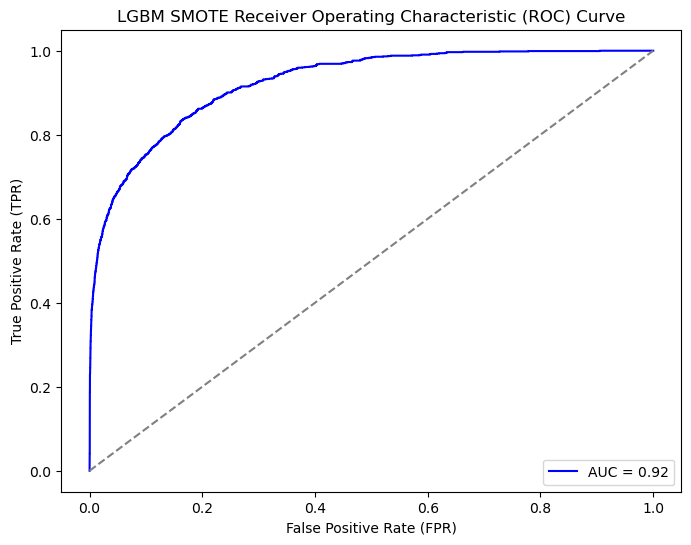

In [53]:
probabilities = lgbm_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('LGBM SMOTE Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

### ADASYN 

In [54]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_resampled_ada, y_resampled_ada = adasyn.fit_resample(X_train, y_train)

lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_resampled_ada, y_resampled_ada)

predictions = lgbm_model.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.9361
F1 Score: 0.6440
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     10608
           1       0.73      0.57      0.64      1187

    accuracy                           0.94     11795
   macro avg       0.84      0.78      0.80     11795
weighted avg       0.93      0.94      0.93     11795

Confusion Matrix: 
[[10359   249]
 [  505   682]]


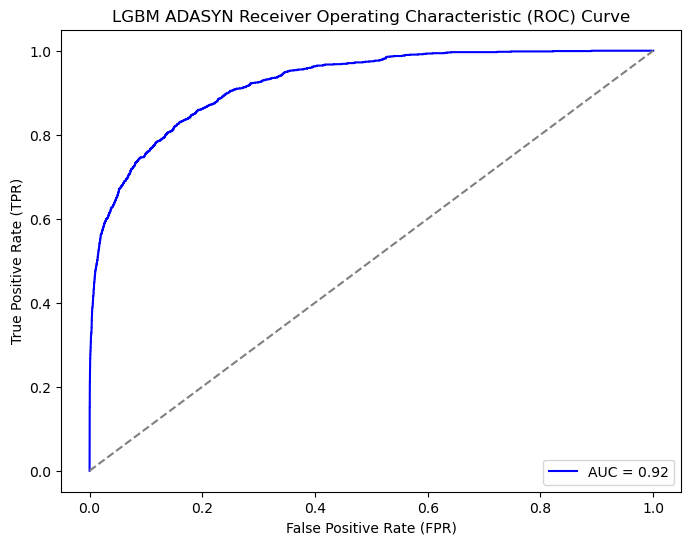

In [55]:
probabilities = lgbm_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('LGBM ADASYN Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

### Random Undersampling 

In [56]:
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(random_state=42)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train, y_train)

lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_resampled_ros, y_resampled_ros)

predictions = lgbm_model.predict(X_val)

accuracy = accuracy_score(y_val, predictions)
f1 = f1_score(y_val, predictions)
classification_rep = classification_report(y_val, predictions)
confusion_mat = confusion_matrix(y_val, predictions)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print(f'Classification Report: \n{classification_rep}')
print(f'Confusion Matrix: \n{confusion_mat}')

Accuracy: 0.8507
F1 Score: 0.5244
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     10608
           1       0.39      0.82      0.52      1187

    accuracy                           0.85     11795
   macro avg       0.68      0.84      0.72     11795
weighted avg       0.92      0.85      0.87     11795

Confusion Matrix: 
[[9063 1545]
 [ 216  971]]


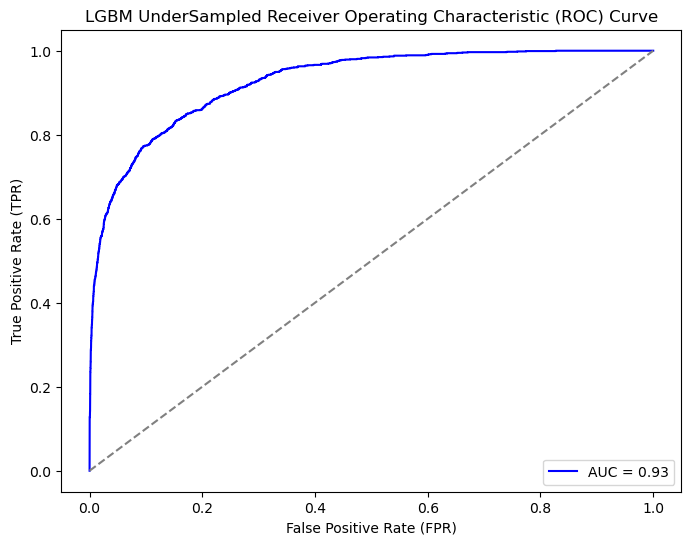

In [57]:
probabilities = lgbm_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, probabilities)

auc = roc_auc_score(y_val, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('LGBM UnderSampled Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

## LightGBM Tuning 

### (Early stopping, feature selection, decision threshold, hyperparameter tuning & pseudo labelling)

### Using label encoded data

#### I tried oversampling the data using SMOTE & ADASYN and also tried undersampling the data but it only resulted in a lesser performing model as opposed to using the original data -  the same goes for any dimensionality reduction techniques.

In [58]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# ORIGINAL PARAM_GRID
# param_grid = {
#     'objective': ['binary'],
#     'class_weight': ['balanced', None],
#     'num_leaves': [31, 40, 50, 60, 70],
#     'learning_rate': [0.005, 0.01, 0.05, 1.0],
#     'max_depth': [-1, 6, 8, 10],
#     'min_child_samples': [10, 20, 30, 40],
#     'subsample': [0.7, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
#     'boosting_type': ['gbdt', 'dart'],
#     'reg_alpha': [0, 0.1, 0.5, 1],
#     'reg_lambda': [0, 1, 5, 10, 15],
#     'n_estimators': [500, 1000, 2000, 3000]
# }

#BEST PARAMETERS FROM GRID ABOVE -- put it here to save processing time for retraining the model --
param_grid = {
    'objective': ['binary'],
    'class_weight': [None],
    'num_leaves': [70],
    'learning_rate': [0.05],
    'max_depth': [-1],
    'min_child_samples': [20],
    'subsample': [0.7],
    'colsample_bytree': [0.7],
    'boosting_type': ['gbdt'],
    'reg_alpha': [1],
    'reg_lambda': [5],
    'n_estimators': [3000]
}

lgbm_model = LGBMClassifier(metric='binary_logloss',
                            random_state=42,
                            n_jobs=-1)


grid_search = HalvingGridSearchCV(lgbm_model,
                                  param_grid,
                                  cv=3,
                                  verbose=2,
                                  n_jobs=-1,
                                  factor=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
unseen_probs = best_model.predict_proba(unknown_healthcare_data)[:, 1]
high_confidence_indices = np.where(unseen_probs > 0.65)[0]
pseudo_labels = (unseen_probs[high_confidence_indices] > 0.5).astype(int)
pseudo_labeled_data = unknown_healthcare_data.iloc[high_confidence_indices]
X_train_augmented = pd.concat([X_train, pseudo_labeled_data])
y_train_augmented = np.concatenate([y_train, pseudo_labels])
best_model.fit(X_train_augmented, y_train_augmented)

top_24 = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
}).nlargest(24, 'importance')['feature'].tolist()

X_train_ = X_train[top_24]
X_val_ = X_val[top_24]

best_model.fit(X_train_, y_train, 
               eval_set=[(X_val_, y_val)], 
               eval_metric='binary_logloss',
               early_stopping_rounds=50, 
               verbose=True)

probs = best_model.predict_proba(X_val_)[:, 1]
predictions_adjusted = (probs > 0.4).astype(int)

accuracy = accuracy_score(y_val, predictions_adjusted)
f1 = f1_score(y_val, predictions_adjusted)
classification_rep = classification_report(y_val, predictions_adjusted)
confusion_mat = confusion_matrix(y_val, predictions_adjusted)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print('Classification Report: \n', classification_rep)
print('Confusion Matrix: \n', confusion_mat)

n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 35385
max_resources_: 35385
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 1
n_resources: 35385
Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\Dean\anaconda3\envs\Python39\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Dean\anaconda3\envs\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.311699
[2]	valid_0's binary_logloss: 0.298609
[3]	valid_0's binary_logloss: 0.288175
[4]	valid_0's binary_logloss: 0.27947
[5]	valid_0's binary_logloss: 0.272562
[6]	valid_0's binary_logloss: 0.26611
[7]	valid_0's binary_logloss: 0.260854
[8]	valid_0's binary_logloss: 0.254994
[9]	valid_0's binary_logloss: 0.25001
[10]	valid_0's binary_logloss: 0.245634
[11]	valid_0's binary_logloss: 0.241163
[12]	valid_0's binary_logloss: 0.237466
[13]	valid_0's binary_logloss: 0.233888
[14]	valid_0's binary_logloss: 0.230498
[15]	valid_0's binary_logloss: 0.227515
[16]	valid_0's binary_logloss: 0.224721
[17]	valid_0's binary_logloss: 0.22194
[18]	valid_0's binary_logloss: 0.219345
[19]	valid_0's binary_logloss: 0.216944
[20]	valid_0's binary_logloss: 0.214891
[21]	valid_0's binary_logloss: 0.212824
[22]	valid_0's binary_logloss: 0.211009
[23]	valid_0's binary_logloss: 0.208948
[24]	valid_0's binary_logloss: 0.207192
[25]	valid_0's binary_logloss: 0.205547
[26]	valid_0'

             Feature  Importance
4     AdmitProcedure        1644
0     AdmitDiagnosis        1513
2            NumLabs        1330
1           NumInput        1278
9       NumCPTevents        1150
3                age        1144
7   TotalNumInteract        1006
6     NumChartEvents         986
5       NumMicroLabs         966
12           LOSdays         917
10             NumRx         901
8       NumDiagnosis         851
11         NumOutput         787
14          NumProcs         687
13          NumNotes         581
16     NumProcEvents         536
15      NumTransfers         534
17          religion         360
18         ethnicity         315
20    admit_location         314
19    marital_status         306
21         insurance         260
22       NumCallouts         259
23        admit_type         143


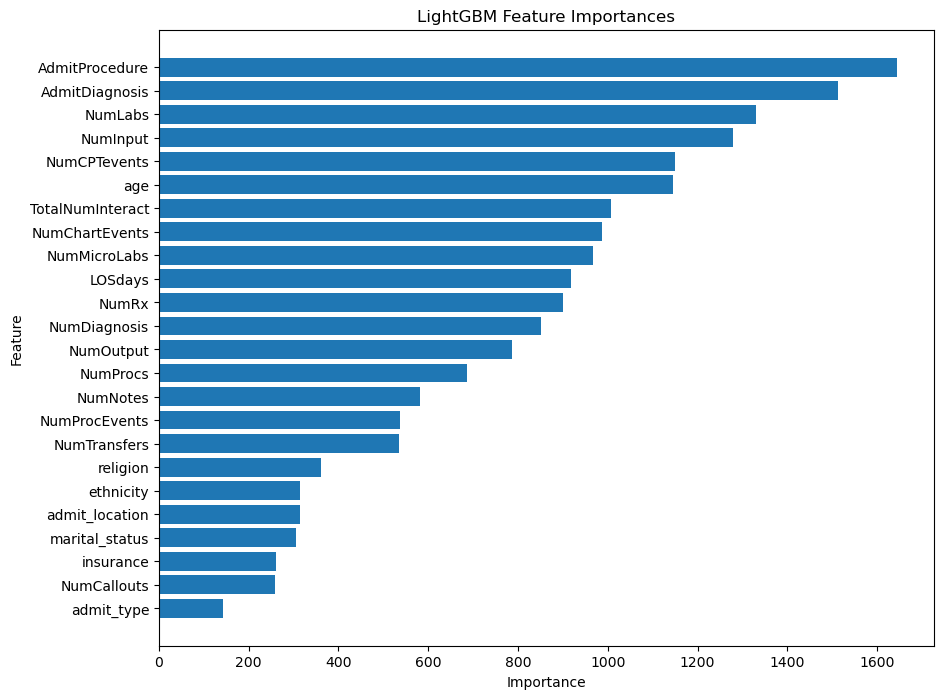

In [59]:
feature_importances = best_model.feature_importances_

features = pd.DataFrame({
    'Feature': X_train_.columns,
    'Importance': feature_importances
})

features = features.sort_values(by='Importance', ascending=False)
print(features)

plt.figure(figsize=(10, 8))
plt.barh(features['Feature'], features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('LightGBM Feature Importances')
plt.gca().invert_yaxis()
plt.show()

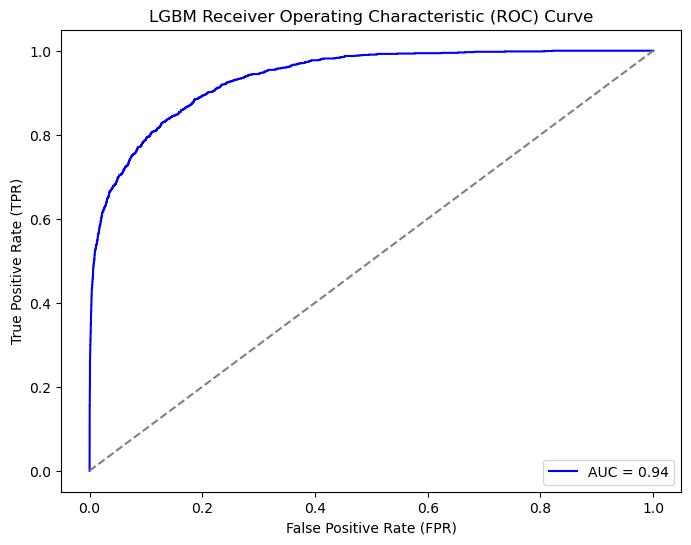

In [60]:
fpr, tpr, thresholds = roc_curve(y_val, probs)

auc = roc_auc_score(y_val, probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('LGBM Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

### Exporting predictions to .csv file for Kaggle submission 

In [61]:
best_lgbm_model = best_model
trained_feature_order = best_lgbm_model.feature_name_
unknown_healthcare_data_reordered = unknown_healthcare_data[trained_feature_order]

lgbm_probabilities = best_lgbm_model.predict_proba(unknown_healthcare_data_reordered)[:, 1]
lgbm_predictions = (lgbm_probabilities > 0.4).astype(int)

lgbm_predictions_df = pd.DataFrame({
    "row ID": ['Row' + str(i) for i in unknown_healthcare_data.index],
    "Predicted-ExpiredHospital": lgbm_predictions
})

lgbm_predictions_df.to_csv("lgbm_predictions_24f_0.4_threshold_early50_ps0.65_halvinggrid_0.25.csv", index=False)

## Catboost Tuning 

### (Early stopping, feature selection, decision threshold, hyperparameter tuning & pseudo labelling)

### Using label encoded data

In [62]:
# ORIGINAL PARAMETER GRID
# param_grid = {
#     'loss_function': ['Logloss', 'CrossEntropy'],
#     'learning_rate': [0.005, 0.01, 0.05, 0.1, 0.2],
#     'depth': [4, 6, 8, 10],
#     'min_child_samples': [10, 20, 30],
#     'subsample': [0.6, 0.7, 0.8, 0.9],
#     'rsm': [0.6, 0.7, 0.8, 0.9], 
#     'boosting_type': ['Ordered', 'Plain'],
#     'l2_leaf_reg': [0.1, 1, 3, 5, 10],
#     'iterations': [1000, 2000, 3000],
#     'border_count': [32, 64, 128, 254]
# }
#BEST PARAMETERS FROM GRID ABOVE -- put it here to save processing time for retraining the model --
param_grid = {
        'loss_function': ['Logloss'],
        'learning_rate': [0.05],
        'depth': [6],
        'min_child_samples': [20],
        'subsample': [0.7],
        'rsm': [0.7], 
        'boosting_type': ['Ordered'],
        'l2_leaf_reg': [1],
        'iterations': [3000],
        'border_count': [254]
}

catboost_model = CatBoostClassifier(loss_function='Logloss',
                                    eval_metric='Logloss',
                                    verbose=200,
                                    random_seed=42,
                                    thread_count=-1)

grid_search = HalvingGridSearchCV(catboost_model,
                                  param_grid,
                                  cv=3,
                                  verbose=2,
                                  n_jobs=-1,
                                  factor=2)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
unseen_probs = best_model.predict_proba(unknown_healthcare_data)[:, 1]
high_confidence_indices = np.where(unseen_probs > 0.65)[0]
pseudo_labels = (unseen_probs[high_confidence_indices] > 0.5).astype(int)
pseudo_labeled_data = unknown_healthcare_data.iloc[high_confidence_indices]
X_train_augmented = pd.concat([X_train, pseudo_labeled_data])
y_train_augmented = np.concatenate([y_train, pseudo_labels])
best_model.fit(X_train_augmented, y_train_augmented)

top_24 = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.get_feature_importance()
}).nlargest(24, 'importance')['feature'].tolist()

X_train_ = X_train[top_24]
X_val_ = X_val[top_24]

best_model.fit(X_train_, y_train,
               eval_set=[(X_val_, y_val)],
               early_stopping_rounds=50,
               verbose=True)

probs = best_model.predict_proba(X_val_)[:, 1]
predictions_adjusted = (probs > 0.4).astype(int)

accuracy = accuracy_score(y_val, predictions_adjusted)
f1 = f1_score(y_val, predictions_adjusted)
classification_rep = classification_report(y_val, predictions_adjusted)
confusion_mat = confusion_matrix(y_val, predictions_adjusted)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print('Classification Report: \n', classification_rep)
print('Confusion Matrix: \n', confusion_mat)

n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 35385
max_resources_: 35385
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 1
n_resources: 35385
Fitting 3 folds for each of 1 candidates, totalling 3 fits
0:	learn: 0.6274505	total: 45.8ms	remaining: 2m 17s
200:	learn: 0.1580511	total: 10s	remaining: 2m 19s
400:	learn: 0.1390083	total: 20.2s	remaining: 2m 10s
600:	learn: 0.1276462	total: 30.5s	remaining: 2m 1s
800:	learn: 0.1194570	total: 40.8s	remaining: 1m 52s
1000:	learn: 0.1132982	total: 51.2s	remaining: 1m 42s
1200:	learn: 0.1092254	total: 1m 1s	remaining: 1m 31s
1400:	learn: 0.1057778	total: 1m 11s	remaining: 1m 21s
1600:	learn: 0.1027794	total: 1m 21s	remaining: 1m 11s
1800:	learn: 0.1005513	total: 1m 31s	remaining: 1m 1s
2000:	learn: 0.0987076	total: 1m 41s	remaining: 50.9s
2200:	learn: 0.0970673	total: 1m 52s	remaining: 40.7s
2400:	learn: 0.0959162	total: 2m 1s	remaining: 30.4s
2600:	learn: 0.0947967	total: 2m 11s	remain

             Feature  Importance
0                age   17.827698
1            NumLabs   10.398582
2     AdmitProcedure    7.514760
10        admit_type    6.590741
4           NumInput    5.815717
7       NumCPTevents    5.778342
5   TotalNumInteract    5.254791
3       NumMicroLabs    4.897787
8              NumRx    4.045725
16          NumProcs    4.022536
14       NumCallouts    3.954316
6     NumChartEvents    3.541617
11         NumOutput    3.456203
15      NumTransfers    3.038171
9       NumDiagnosis    2.947528
13           LOSdays    2.167429
12    AdmitDiagnosis    2.018051
18       LOSgroupNum    1.493862
19     NumProcEvents    1.268859
21         insurance    1.208261
20         ethnicity    1.049997
17          NumNotes    0.742003
22    admit_location    0.614576
23          religion    0.352447


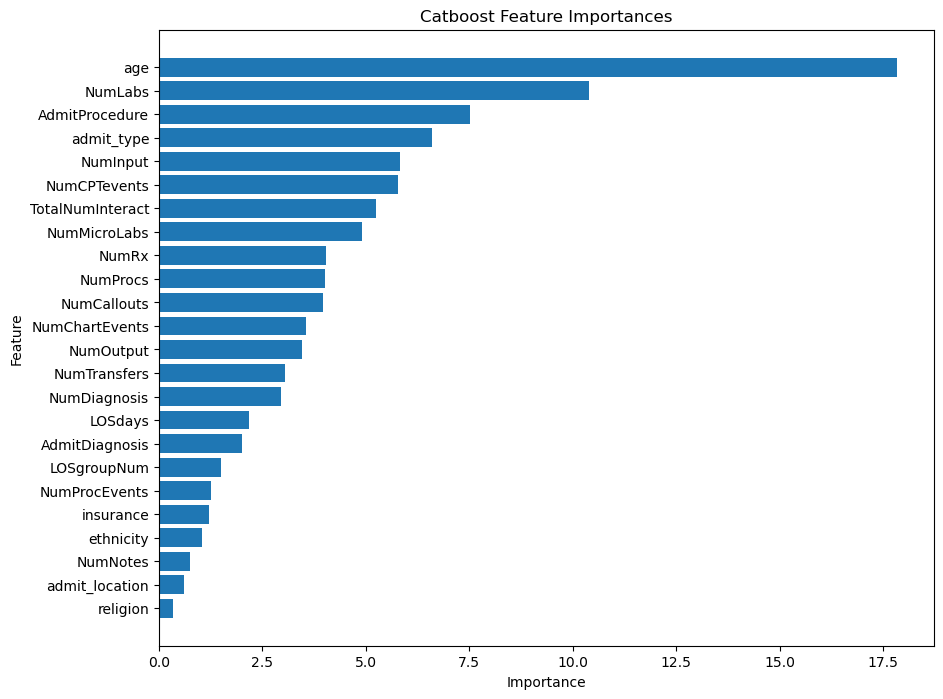

In [63]:
feature_importances = best_model.feature_importances_

features = pd.DataFrame({
    'Feature': X_train_.columns,
    'Importance': feature_importances
})

features = features.sort_values(by='Importance', ascending=False)
print(features)

plt.figure(figsize=(10, 8))
plt.barh(features['Feature'], features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Catboost Feature Importances')
plt.gca().invert_yaxis()
plt.show()

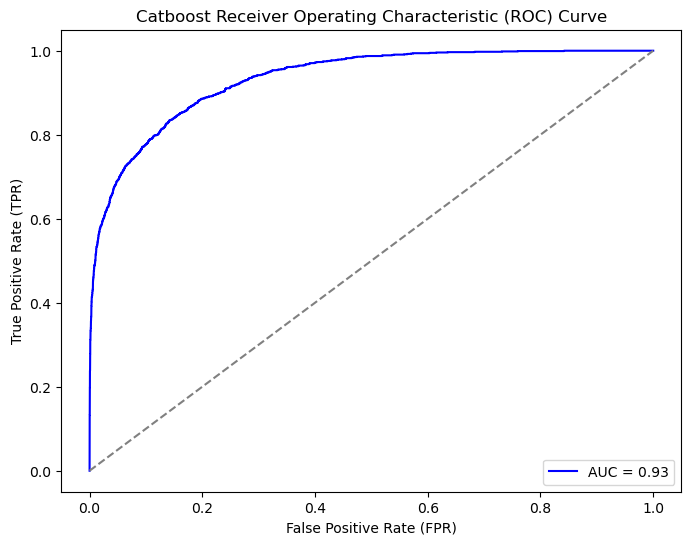

In [64]:
fpr, tpr, thresholds = roc_curve(y_val, probs)

auc = roc_auc_score(y_val, probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('Catboost Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

In [65]:
best_catboost_model = best_model
trained_feature_order = best_catboost_model.feature_names_
unknown_healthcare_data_reordered = unknown_healthcare_data[trained_feature_order]

catboost_probabilities = best_catboost_model.predict_proba(unknown_healthcare_data_reordered)[:, 1]
catboost_predictions = (catboost_probabilities > 0.4).astype(int)

catboost_predictions_df = pd.DataFrame({
    "row ID": ['Row' + str(i) for i in unknown_healthcare_data.index],
    "Predicted-ExpiredHospital": catboost_predictions
})

catboost_predictions_df.to_csv("catboost_predictions_24f_0.4_threshold_early50_ps0.65_halvinggrid_0.25.csv", index=False)

## XGBoost Tuning 

### (Early stopping, feature selection, decision threshold, hyperparameter tuning & pseudo labelling)

### Using label encoded data

In [66]:
# ORIGINAL PARAMETER GRID
# param_grid = {
#     'objective': ['binary:logistic', 'binary:hinge'],
#     'scale_pos_weight': [1, 10, 50],
#     'max_depth': [3, 6, 9, 12],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'min_child_weight': [1, 5, 10],
#     'subsample': [0.5, 0.7, 0.9],
#     'colsample_bytree': [0.5, 0.7, 0.9],
#     'booster': ['gbtree', 'dart'],
#     'alpha': [0, 1, 5],
#     'lambda': [0, 1, 5],
#     'n_estimators': [1000, 2000, 3000],
#     'gamma': [0, 0.1, 0.5]
# # }
#BEST PARAMETERS FROM GRID ABOVE -- put it here to save processing time for retraining the model --
param_grid = {
    'objective': ['binary:logistic'],
    'scale_pos_weight': [1],
    'max_depth': [6],
    'learning_rate': [0.05],
    'min_child_weight': [1],
    'subsample': [0.7],
    'colsample_bytree': [0.7],
    'booster': ['gbtree'],
    'alpha': [1],
    'lambda': [1],
    'n_estimators': [3000],
    'gamma': [0]
}

xgb_model = XGBClassifier(objective='binary:logistic',
                          random_state=42,
                          n_jobs=-1,
                          eval_metric='logloss')

grid_search = HalvingGridSearchCV(xgb_model,
                                  param_grid,
                                  cv=3,
                                  verbose=2,
                                  n_jobs=-1,
                                  factor=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
unseen_probs = best_model.predict_proba(unknown_healthcare_data)[:, 1]
high_confidence_indices = np.where(unseen_probs > 0.65)[0]
pseudo_labels = (unseen_probs[high_confidence_indices] > 0.5).astype(int)
pseudo_labeled_data = unknown_healthcare_data.iloc[high_confidence_indices]
X_train_augmented = pd.concat([X_train, pseudo_labeled_data])
y_train_augmented = np.concatenate([y_train, pseudo_labels])
best_model.fit(X_train_augmented, y_train_augmented)

top_24 = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
}).nlargest(24, 'importance')['feature'].tolist()

X_train_ = X_train[top_24]
X_val_ = X_val[top_24]

best_model.fit(X_train_, y_train, 
               eval_set=[(X_val_, y_val)],
               early_stopping_rounds=50, 
               verbose=True)

probs = best_model.predict_proba(X_val_)[:, 1]
predictions_adjusted = (probs > 0.4).astype(int)

accuracy = accuracy_score(y_val, predictions_adjusted)
f1 = f1_score(y_val, predictions_adjusted)
classification_rep = classification_report(y_val, predictions_adjusted)
confusion_mat = confusion_matrix(y_val, predictions_adjusted)

print(f'Accuracy: {accuracy:.4f}')
print(f"F1 Score: {f1:.4f}")
print('Classification Report: \n', classification_rep)
print('Confusion Matrix: \n', confusion_mat)

n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 35385
max_resources_: 35385
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 1
n_resources: 35385
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[0]	validation_0-logloss:0.65633
[1]	validation_0-logloss:0.62233
[2]	validation_0-logloss:0.59125
[3]	validation_0-logloss:0.56300
[4]	validation_0-logloss:0.53692
[5]	validation_0-logloss:0.51393
[6]	validation_0-logloss:0.49211
[7]	validation_0-logloss:0.47187
[8]	validation_0-logloss:0.45326
[9]	validation_0-logloss:0.43606
[10]	validation_0-logloss:0.41996
[11]	validation_0-logloss:0.40513
[12]	validation_0-logloss:0.39152
[13]	validation_0-logloss:0.37861
[14]	validation_0-logloss:0.36672
[15]	validation_0-logloss:0.35553
[16]	validation_0-logloss:0.34525
[17]	validation_0-logloss:0.33544
[18]	validation_0-logloss:0.32651
[19]	validation_0-logloss:0.31816
[20]	validation_0-logloss:0.31035
[21]	validation_0-logloss:0.30276

C:\Users\Dean\anaconda3\envs\Python39\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-logloss:0.29603
[23]	validation_0-logloss:0.28952
[24]	validation_0-logloss:0.28328
[25]	validation_0-logloss:0.27751
[26]	validation_0-logloss:0.27207
[27]	validation_0-logloss:0.26686
[28]	validation_0-logloss:0.26190
[29]	validation_0-logloss:0.25736
[30]	validation_0-logloss:0.25312
[31]	validation_0-logloss:0.24915
[32]	validation_0-logloss:0.24533
[33]	validation_0-logloss:0.24179
[34]	validation_0-logloss:0.23861
[35]	validation_0-logloss:0.23523
[36]	validation_0-logloss:0.23194
[37]	validation_0-logloss:0.22883
[38]	validation_0-logloss:0.22620
[39]	validation_0-logloss:0.22366
[40]	validation_0-logloss:0.22121
[41]	validation_0-logloss:0.21892
[42]	validation_0-logloss:0.21675
[43]	validation_0-logloss:0.21471
[44]	validation_0-logloss:0.21278
[45]	validation_0-logloss:0.21084
[46]	validation_0-logloss:0.20909
[47]	validation_0-logloss:0.20739
[48]	validation_0-logloss:0.20592
[49]	validation_0-logloss:0.20443
[50]	validation_0-logloss:0.20309
[51]	validatio

             Feature  Importance
1            NumLabs    0.119885
2   TotalNumInteract    0.109087
3        NumCallouts    0.084672
0         admit_type    0.070260
4           NumInput    0.045528
5                age    0.045162
14    NumChartEvents    0.040391
8       NumCPTevents    0.040150
10      NumMicroLabs    0.034961
6     AdmitProcedure    0.034918
13             NumRx    0.034642
7        LOSgroupNum    0.033566
9       NumTransfers    0.033419
11         insurance    0.030680
12           LOSdays    0.029711
15     NumProcEvents    0.028597
16      NumDiagnosis    0.027020
17          NumProcs    0.024593
18         NumOutput    0.024253
20    AdmitDiagnosis    0.023926
19    admit_location    0.023128
23    marital_status    0.021505
21          NumNotes    0.020466
22         ethnicity    0.019481


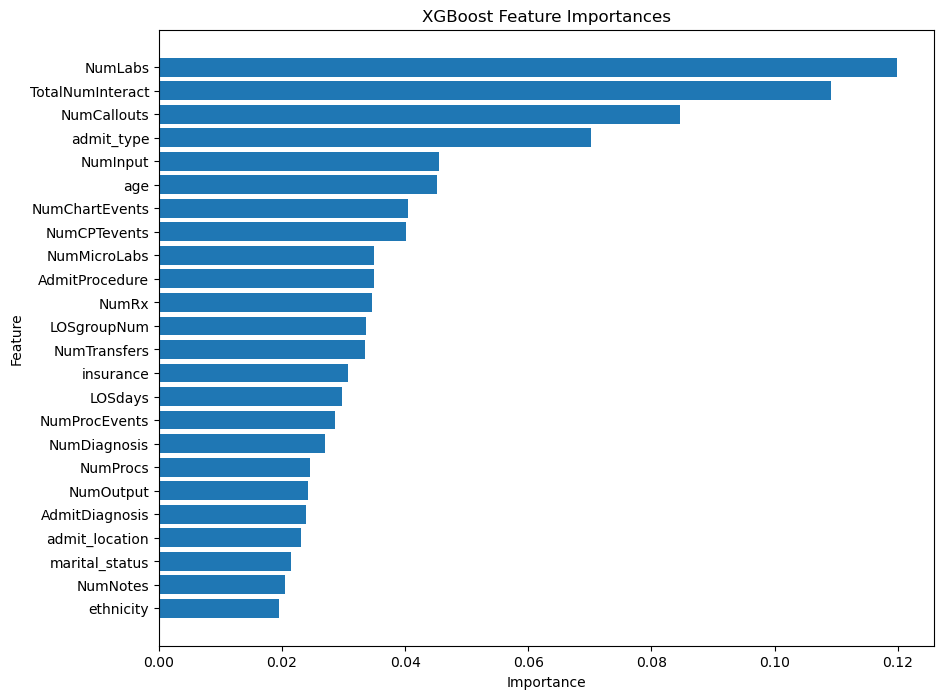

In [67]:
feature_importances = best_model.feature_importances_

features = pd.DataFrame({
    'Feature': X_train_.columns,
    'Importance': feature_importances
})

features = features.sort_values(by='Importance', ascending=False)
print(features)

plt.figure(figsize=(10, 8))
plt.barh(features['Feature'], features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importances')
plt.gca().invert_yaxis()
plt.show()

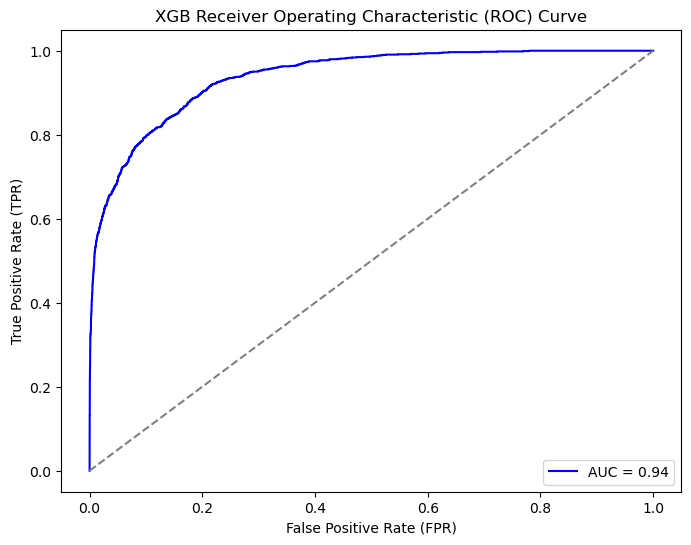

In [68]:
fpr, tpr, thresholds = roc_curve(y_val, probs)

auc = roc_auc_score(y_val, probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('XGB Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

In [69]:
best_xgb_model = best_model
trained_feature_order = best_xgb_model.get_booster().feature_names
unknown_healthcare_data_reordered = unknown_healthcare_data[trained_feature_order]

xgb_probabilities = best_xgb_model.predict_proba(unknown_healthcare_data_reordered)[:, 1]
xgb_predictions = (xgb_probabilities > 0.4).astype(int)

xgb_predictions_df = pd.DataFrame({
    "row ID": ['Row' + str(i) for i in unknown_healthcare_data.index],
    "Predicted-ExpiredHospital": xgb_predictions
})

xgb_predictions_df.to_csv("xgb_predictions_24f_0.4_threshold_early50_ps0.65_halvinggrid_0.25.csv", index=False)

## Stacking Tuning 

### Using the tuned LGBM, Catboost and XGB as base learners and LogisticRegression as the meta learner

### (Decision threshold only)

### Using label encoded data

In [70]:
base_learners = [
    ('catboost', best_catboost_model),
    ('lgbm', best_lgbm_model),
    ('xgb', best_xgb_model)
]

stacking_classifier = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(),
    cv=5,
    stack_method='predict_proba',
    n_jobs=-1,
    passthrough=False
)

stacking_classifier.fit(X_train, y_train)

stacking_predictions = stacking_classifier.predict(X_val)
stacking_probs = stacking_classifier.predict_proba(X_val)[:, 1]

stacking_predictions_adjusted = (stacking_probs > 0.4).astype(int)

stacking_accuracy = accuracy_score(y_val, stacking_predictions_adjusted)
stacking_f1 = f1_score(y_val, stacking_predictions_adjusted)
stacking_classification_rep = classification_report(y_val, stacking_predictions_adjusted)
stacking_confusion_mat = confusion_matrix(y_val, stacking_predictions_adjusted)

print(f'Stacking Accuracy: {stacking_accuracy:.4f}')
print(f"Stacking F1 Score: {stacking_f1:.4f}")
print('Stacking Classification Report: \n', stacking_classification_rep)
print('Stacking Confusion Matrix: \n', stacking_confusion_mat)

Stacking Accuracy: 0.9438
Stacking F1 Score: 0.6693
Stacking Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     10608
           1       0.82      0.57      0.67      1187

    accuracy                           0.94     11795
   macro avg       0.89      0.78      0.82     11795
weighted avg       0.94      0.94      0.94     11795

Stacking Confusion Matrix: 
 [[10461   147]
 [  516   671]]


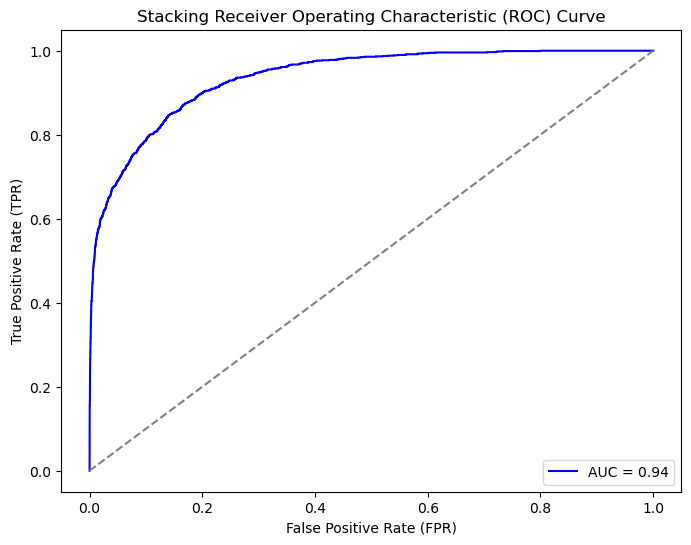

In [71]:
fpr, tpr, thresholds = roc_curve(y_val, stacking_probs)

auc = roc_auc_score(y_val, stacking_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.title('Stacking Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.show()

In [72]:
stacking_probs = stacking_classifier.predict_proba(unknown_healthcare_data)[:, 1]
stacking_predictions_adjusted = (stacking_probs > 0.4).astype(int)

stacking_predictions_df = pd.DataFrame({
    "row ID": ['Row' + str(i) for i in unknown_healthcare_data.index],
    "Predicted-ExpiredHospital": stacking_predictions_adjusted
})

stacking_predictions_df.to_csv("stacking_predictions_0.4_threshold_0.25.csv", index=False)